# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [70]:
df = pd.read_csv('dataset_klasifikasi.csv')

In [71]:
df

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,14.09,Debit,ATM,70.0,Doctor,81.0,1.0,5112.21,0
1,376.24,Debit,ATM,68.0,Doctor,141.0,1.0,13758.91,0
2,126.29,Debit,Online,19.0,Student,56.0,1.0,1122.35,1
3,184.50,Debit,Online,26.0,Student,25.0,1.0,8569.06,0
4,13.45,Credit,Online,26.0,Student,198.0,1.0,7429.40,0
...,...,...,...,...,...,...,...,...,...
2507,856.21,Credit,Branch,33.0,Doctor,109.0,1.0,12690.79,0
2508,251.54,Debit,Branch,48.0,Doctor,177.0,1.0,254.75,0
2509,28.63,Debit,Branch,56.0,Retired,146.0,1.0,3382.91,0
2510,185.97,Debit,Online,23.0,Student,19.0,1.0,1776.91,1


# **3. Data Splitting**

In [72]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols = [col for col in num_cols if col != 'Cluster']
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [73]:
scaler = StandardScaler()
encoder = LabelEncoder()

df[num_cols] = scaler.fit_transform(df[num_cols])

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

In [74]:
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,-1.074361,1,0,1.423718,0,-0.552443,-0.206794,-0.000537,0
1,0.362645,1,0,1.311287,0,0.305314,-0.206794,2.216472,0
2,-0.629153,1,2,-1.443277,3,-0.909842,-0.206794,-1.023534,1
3,-0.398176,1,2,-1.049768,3,-1.353017,-0.206794,0.885797,0
4,-1.076900,0,2,-1.049768,3,1.120184,-0.206794,0.593589,0


In [75]:
X = df.drop(columns=['Cluster'])
y = df['Cluster']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 2009
Jumlah data testing: 503


Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [77]:
svm_model = SVC(kernel='rbf', random_state=0)

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [78]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

Algoritma SVM (Support Vector Machine) dan Random Forest dipilih karena:

1. Support Vector Machine (SVM)
- Sesuai untuk dataset berukuran sedang (2512 baris), dengan komputasi yang masih efisien.
- Mampu menangani pola data yang kompleks, terutama jika data tidak dapat dipisahkan secara linear.
- Efektif dalam bekerja dengan data berdimensi tinggi, terutama jika terdapat banyak fitur yang berperan dalam klasifikasi.
- Menggunakan kernel trick untuk memetakan data ke dimensi yang lebih tinggi guna meningkatkan akurasi pemisahan kelas.

2. Random Forest
- Dapat memproses data numerik maupun kategorikal, sesuai dengan karakteristik dataset ini.
- Tahan terhadap outlier dan tidak bergantung pada distribusi data tertentu, karena menggunakan kombinasi banyak pohon keputusan.
- Mampu menangani missing values, karena masih dapat membangun model berdasarkan data yang tersedia.
- Memberikan interpretasi yang baik, dengan fitur importance yang dapat digunakan untuk mengetahui faktor yang paling berpengaruh dalam klasifikasi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [79]:
y_pred_svm = svm_model.predict(X_test)

y_pred_rf = rf_model.predict(X_test)

In [80]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

# hasil evaluasi
print(f"SVM - Accuracy: {svm_accuracy:.4f}, F1-Score: {svm_f1:.4f}")
print(f"Random Forest - Accuracy: {rf_accuracy:.4f}, F1-Score: {rf_f1:.4f}")

SVM - Accuracy: 0.9940, F1-Score: 0.9941
Random Forest - Accuracy: 0.9920, F1-Score: 0.9922


In [81]:
print("Classification Report untuk SVM:")
print(classification_report(y_test, y_pred_svm))

print("Classification Report untuk Random Forest:")
print(classification_report(y_test, y_pred_rf))

Classification Report untuk SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      0.99      0.99        89
           2       0.93      0.97      0.95        29

    accuracy                           0.99       503
   macro avg       0.98      0.98      0.98       503
weighted avg       0.99      0.99      0.99       503

Classification Report untuk Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      0.98      0.99        89
           2       0.90      0.97      0.93        29

    accuracy                           0.99       503
   macro avg       0.97      0.98      0.97       503
weighted avg       0.99      0.99      0.99       503



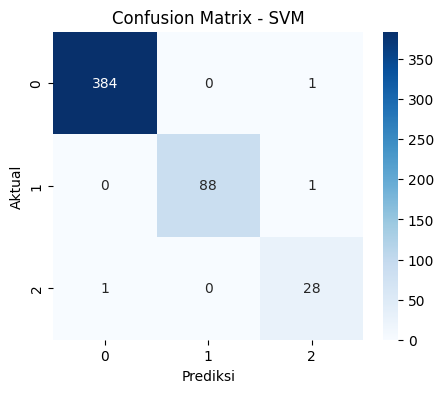

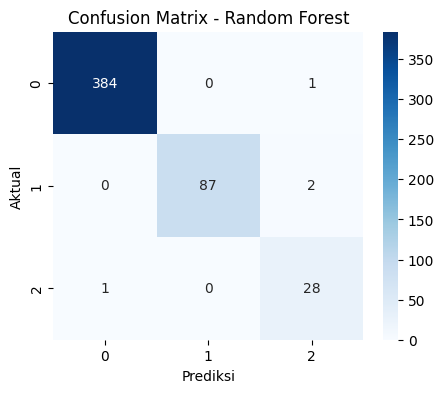

In [82]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [83]:
# Definisi parameter
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='f1_macro', n_jobs=-1)
svm_grid.fit(X_train, y_train)

best_svm = svm_grid.best_estimator_
print("Parameter terbaik untuk SVM:", svm_grid.best_params_)


Parameter terbaik untuk SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [84]:
# Definisi parameter
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='f1_macro', n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
print("Parameter terbaik untuk Random Forest:", rf_grid.best_params_)


Parameter terbaik untuk Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [85]:
y_pred_best_svm = best_svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred_best_svm)
svm_f1 = f1_score(y_test, y_pred_best_svm, average='weighted')

print(f"SVM - Accuracy: {svm_accuracy:.4f}, F1-Score: {svm_f1:.4f}")

SVM - Accuracy: 0.9940, F1-Score: 0.9941


In [86]:
y_pred_best_rf = best_rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
rf_f1 = f1_score(y_test, y_pred_best_rf, average='weighted')

print(f"Random Forest- Accuracy:: {rf_accuracy:.4f}, F1-Score: {rf_f1:.4f}")

Random Forest- Accuracy:: 0.9920, F1-Score: 0.9922


In [87]:
print("\nClassification Report untuk SVM (Parameter Terbaik):")
print(classification_report(y_test, y_pred_best_svm))
print("Classification Report untuk Random Forest (Parameter Terbaik):")
print(classification_report(y_test, y_pred_best_rf))


Classification Report untuk SVM (Parameter Terbaik):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      0.98      0.99        89
           2       0.93      0.97      0.95        29

    accuracy                           0.99       503
   macro avg       0.98      0.98      0.98       503
weighted avg       0.99      0.99      0.99       503

Classification Report untuk Random Forest (Parameter Terbaik):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      0.98      0.99        89
           2       0.90      0.97      0.93        29

    accuracy                           0.99       503
   macro avg       0.97      0.98      0.97       503
weighted avg       0.99      0.99      0.99       503



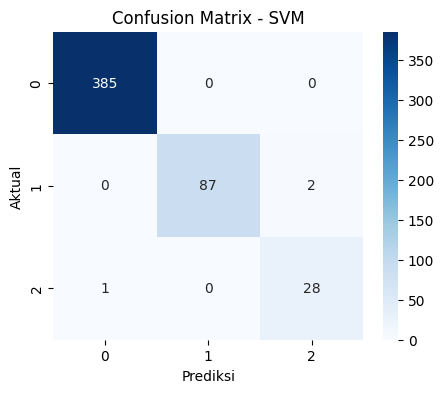

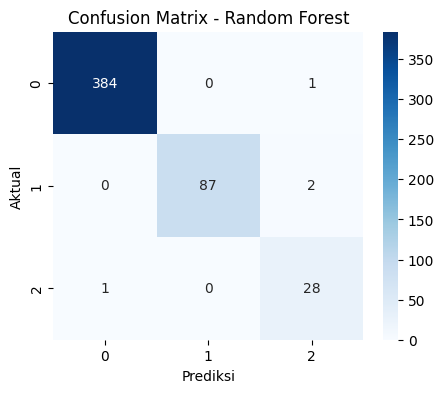

In [88]:
plot_confusion_matrix(y_test, y_pred_best_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_best_rf, "Random Forest")

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).

  - Tidak ada perubahan signifikan setelah tuning, baik pada SVM maupun Random Forest.
  - SVM dan random forest tetap stabil, menunjukkan bahwa parameter awal sudah cukup baik.
  - Random Forest tidak mengalami peningkatan performa setelah tuning, dengan akurasi dan F1-score tetap sama.


2. Identifikasi kelemahan model, seperti:
  - Kelas 2 masih memiliki precision lebih sedikit rendah dibanding kelas lainnya.
  - Recall kelas 1 pada SVM sedikit menurun (dari 0.99 ke 0.98), meskipun secara keseluruhan performanya tetap sangat baik.
  - Akurasi yang sangat tinggi bisa menjadi indikasi overfitting, di mana model terlalu menyesuaikan dengan data training dan berisiko menurun performanya pada data baru. Namun, tidak ada tanda underfitting karena semua akurasi dan F1-score menunjukkan hasil yang tinggi.

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

- Menambah data untuk kelas 2 agar keseimbangan antar kelas lebih baik.
- Mencoba algoritma lain seperti Gradient Boosting, XGBoost, atau K-Nearest Neighbors (KNN) untuk hasil lebih optimal.
- Melakukan feature engineering untuk meningkatkan relevansi fitur.
- Menggunakan cross-validation agar model lebih stabil di berbagai dataset.